In [ ]:
import mne
from mne.preprocessing import ICA
from mne.preprocessing import annotate_muscle_zscore

# Step 1: Load the .vhdr file (BrainVision format)
eegfile = '../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr'
raw = mne.io.read_raw_brainvision(eegfile, preload=True)


In [ ]:
# Step 2: Rename or set types for non-EEG channels
print(raw.info['ch_names'])

non_eeg_channels = {
        'VPVA': 'eog',
        'VNVB': 'eog',
        'HPHL': 'eog',
        'HNHR': 'eog',
        'Erbs': 'ecg',
        'OrbOcc': 'emg',
    }
raw.set_channel_types(non_eeg_channels)

In [ ]:
# Step 3: Set montage with on_missing='ignore' for auxiliary channels
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

In [ ]:
# Step 4: Continue with preprocessing
raw.filter(l_freq=0.1, h_freq=40.0)
notch_freq=[50.0]
raw.notch_filter(freqs=notch_freq, picks='eeg')

In [ ]:
# Fit the ICA model
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)

# Select only EEG channels
eeg_picks = mne.pick_types(raw.info, eeg=True,eog=True ,exclude='bads')


# Fit ICA only on EEG channels
ica.fit(raw, picks=eeg_picks)

In [ ]:
raw.set_eeg_reference('average', projection=True,verbose=True)
raw = raw.apply_proj()

In [ ]:
# Find and exclude EOG artifacts
eog_indices, scores = ica.find_bads_ecg(raw, ch_name='Erbs')
ica.exclude = eog_indices

# Apply ICA to the EEG channels only

# ica.plot_components(inst=raw)


In [ ]:
eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=['VPVA', 'VNVB', 'HPHL', 'HNHR'])
ica.exclude.extend(eog_indices)


In [ ]:
raw = ica.apply(raw)


In [ ]:
ica.plot_components()

In [ ]:
raw.plot(start=45)

In [ ]:
from mne.preprocessing import annotate_muscle_zscore
annotations_muscle, scores = annotate_muscle_zscore(raw, ch_type='eeg', threshold=4.0)
raw.set_annotations(annotations_muscle)


In [ ]:
raw_clean = raw.copy()
raw_clean.set_annotations(raw.annotations)
# raw.plot(start=45, duration=60)
raw_clean.plot(start=45, duration=10)

In [ ]:
# # Only drop segments labeled 'BAD_muscle' in the annotations
# raw_clean = raw.copy()
# raw_clean.set_annotations(raw.annotations)  # ensure the muscle annotations are in place
# # Keep only segments that are NOT labeled 'BAD_muscle'
# raw_clean = raw.copy()
# for ann in raw.annotations:
#     if 'BAD_muscle' in ann['description']:
#         tmin = ann['onset']
#         tmax = tmin + ann['duration']
#         raw_clean = raw_clean.copy().crop(tmin, tmax, include_tmax=False)

# # Or simply skip (exclude) epochs containing these annotations if you’re working in epoch mode.


Extracting parameters from ../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 60002  =      0.000 ...   120.004 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) m

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Fitting ICA took 0.6s.


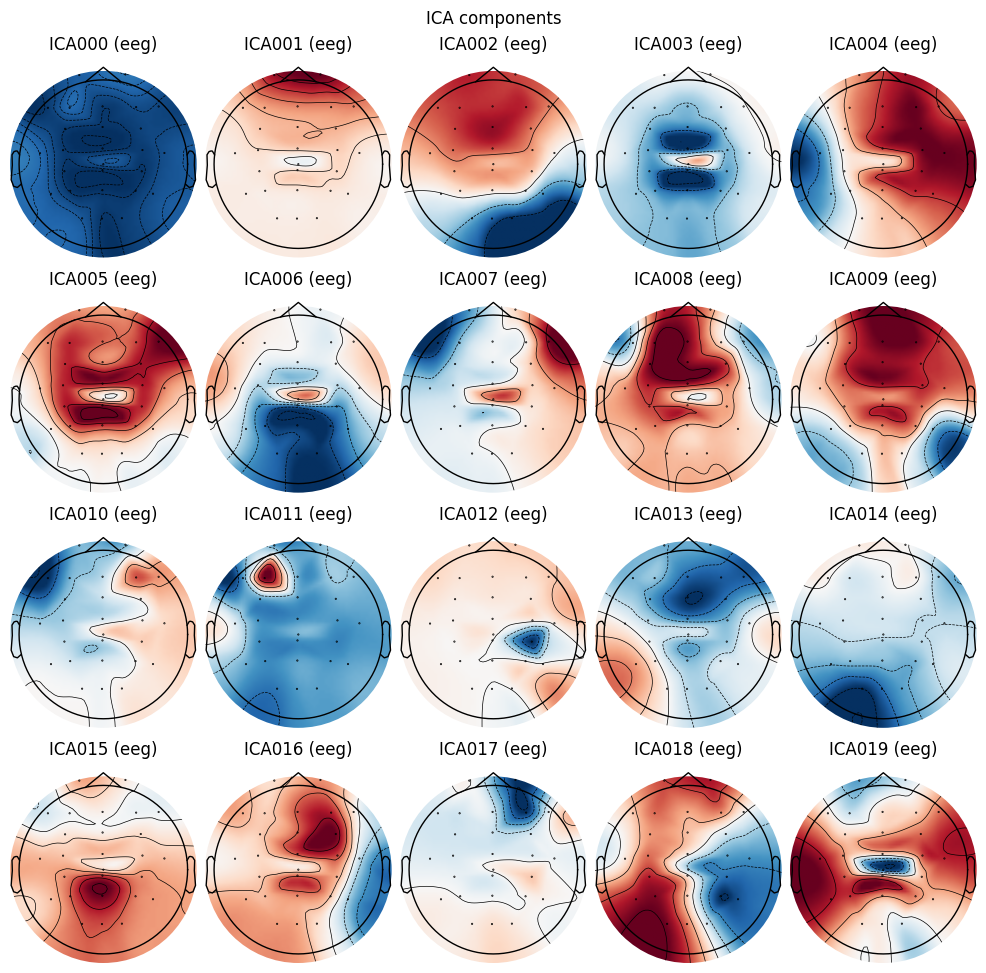

Creating RawArray with float64 data, n_channels=25, n_times=60003
    Range : 0 ... 60002 =      0.000 ...   120.004 secs
Ready.


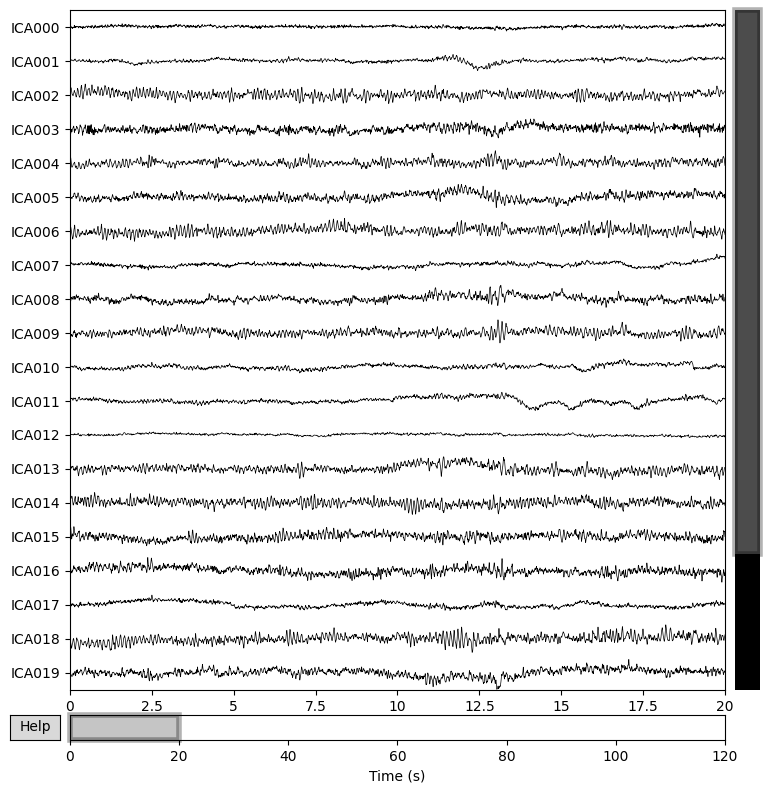

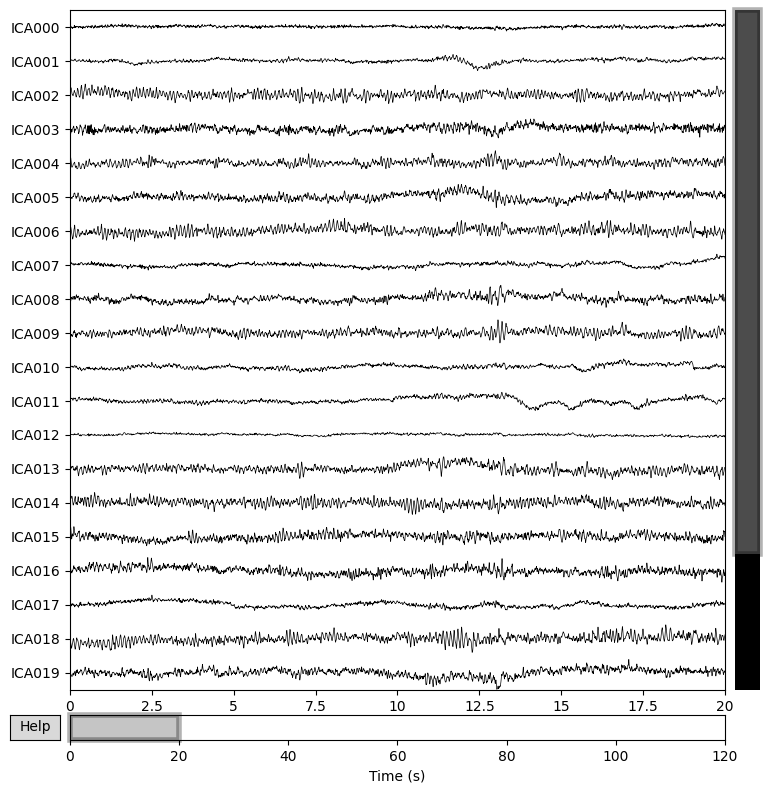

In [16]:
import mne
from mne.preprocessing import ICA, annotate_muscle_zscore

# Load EEG Data
eegfile = '../dataset_s/mdd/sub-88000489/ses-1/eeg/sub-88000489_ses-1_task-restEC_eeg.vhdr'
# eegfile = '../dataset_s/mdd/sub-88001661/ses-1/eeg/sub-88001661_ses-1_task-restEC_eeg.vhdr'
raw = mne.io.read_raw_brainvision(eegfile, preload=True)

# Rename Non-EEG Channels
non_eeg_channels = {
    'VPVA': 'eog',
    'VNVB': 'eog',
    'HPHL': 'eog',
    'HNHR': 'eog',
    'Erbs': 'ecg',
    'OrbOcc': 'emg',
}
raw.set_channel_types(non_eeg_channels)

# Set Montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

# Filtering (0.1–40 Hz) and Notch Filter (50 Hz)
raw.filter(l_freq=0.1, h_freq=40.0)
raw.notch_filter(freqs=[50.0], picks='eeg')

# Fit ICA with more components
ica = ICA(n_components=20, random_state=97, max_iter=1000)
eeg_picks = mne.pick_types(raw.info, eeg=True, eog=True, exclude='bads')
ica.fit(raw, picks=eeg_picks)

# Manually Inspect ICA Components
ica.plot_components()
ica.plot_sources(raw)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 4 ICA components
    Projecting back using 31 PCA components
EEG channel type selected for re-referencing
Projections have already been applied. Setting proj attribute to True.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1.1e+02 - 1.4e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 110.00
- Lower transition bandwidth: 27.50 Hz (-6 dB cutoff frequency: 96.25 Hz)
- Upper passband edge: 140.00 Hz
- Upper transition bandwidth: 35.00 Hz (-6 dB cutoff frequency: 157.50 Hz)
- Filter length: 61 samples (0.122 s)



/tmp/ipykernel_4191145/665957286.py:7: RuntimeWarning: An average reference projection was already added. The data has been left untouched.
  raw.set_eeg_reference('average', projection=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting 9953 of 60003 (16.59%) samples to NaN, retaining 50050 (83.41%) samples.
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 825 samples (1.650 s)



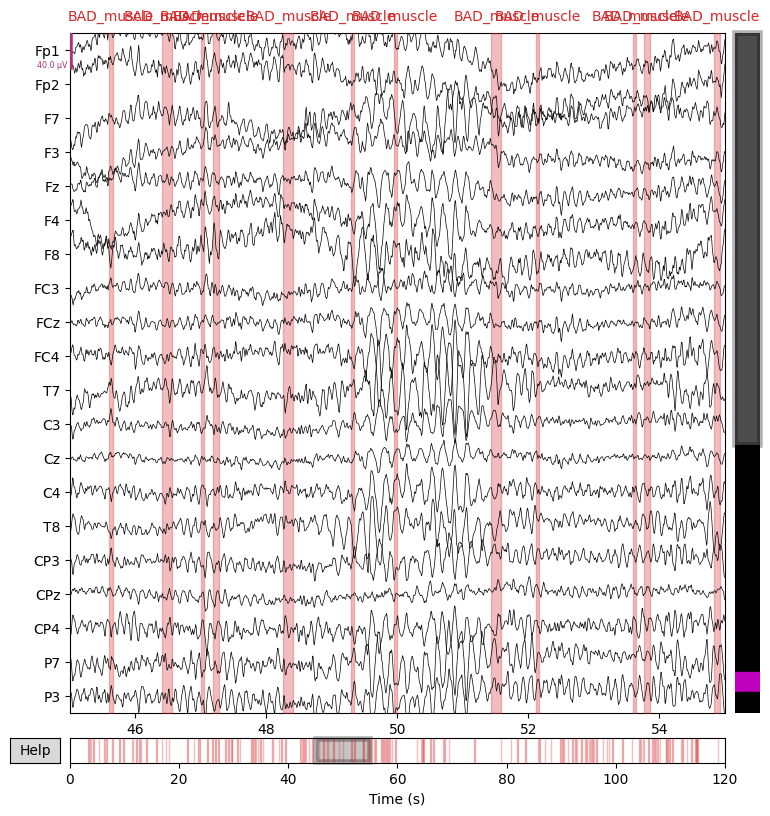

Preprocessing complete! Check ICA plots for better component selection.


In [ ]:


# Exclude manually identified artifact components
ica.exclude = [1,13,3,6,16,15]  # Update with your manual selection
# ica.exclude = [2, 3, 5, 13]
raw = ica.apply(raw)

# Apply Reference & Baseline Correction
raw.set_eeg_reference('average', projection=True)
raw.apply_proj()

# Detect Muscle Artifacts (Stronger Detection)
annotations_muscle, scores = annotate_muscle_zscore(raw, ch_type='eeg', threshold=3.0)  # Lower threshold
raw.set_annotations(annotations_muscle)

# Visualize Cleaned Data
raw_clean = raw.copy()
raw_clean.set_annotations(raw.annotations)
raw_clean.plot(start=45, duration=10)

print("Preprocessing complete! Check ICA plots for better component selection.")


In [ ]:
ica = ICA(n_components=30, random_state=97, max_iter=1000)
eeg_picks = mne.pick_types(raw.info, eeg=True, eog=True, exclude='bads')
ica.fit(raw, picks=eeg_picks)

# Manually Inspect ICA Components
ica.plot_components()
ica.plot_sources(raw)
